# Part 1: Gensim

In [4]:
import re
import requests
import nltk

from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import wordnet as wn
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.util import ngrams

import numpy as np
import matplotlib.pyplot as plt
import random

from gensim.models import Word2Vec

from sklearn.decomposition import IncrementalPCA   
from sklearn.manifold import TSNE   

In [8]:
# try using persuasion 
import requests

r = requests.get(r'https://www.gutenberg.org/cache/epub/105/pg105.txt')
persuasion = r.text

# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
    persuasion = persuasion.replace(char, " ")

# check that it is working
print(persuasion[742:1250])

Persuasion      by Jane Austen    (1818)          Contents       CHAPTER I.   CHAPTER II.   CHAPTER III.   CHAPTER IV.   CHAPTER V.   CHAPTER VI.   CHAPTER VII.   CHAPTER VIII.   CHAPTER IX.   CHAPTER X.   CHAPTER XI.   CHAPTER XII.   CHAPTER XIII.   CHAPTER XIV.   CHAPTER XV.   CHAPTER XVI.   CHAPTER XVII.   CHAPTER XVIII.   CHAPTER XIX.   CHAPTER XX.   CHAPTER XXI.   CHAPTER XXII.   CHAPTER XXIII.   CHAPTER XXIV.          CHAPTER I.      Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man


In [9]:
# trim

persuasion = persuasion[742:473920]

In [10]:
# clean and tokenize persuasion

def clean_the_text(prose: str):
    sentences = nltk.sent_tokenize(prose)
    tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    tokenized_text = [[word.lower() for word in sentence] for sentence in tokenized_sentences]
    return tokenized_text

tokens = clean_the_text(prose = persuasion)

print(tokens[:15])

[['persuasion', 'by', 'jane', 'austen', '(', '1818', ')', 'contents', 'chapter', 'i', '.'], ['chapter', 'ii', '.'], ['chapter', 'iii', '.'], ['chapter', 'iv', '.'], ['chapter', 'v.', 'chapter', 'vi', '.'], ['chapter', 'vii', '.'], ['chapter', 'viii', '.'], ['chapter', 'ix', '.'], ['chapter', 'x', '.'], ['chapter', 'xi', '.'], ['chapter', 'xii', '.'], ['chapter', 'xiii', '.'], ['chapter', 'xiv', '.'], ['chapter', 'xv', '.'], ['chapter', 'xvi', '.']]


In [11]:
#persuasion version
model = Word2Vec(tokens, vector_size=100)

In [12]:
#persuasion version
model.wv.key_to_index

{',': 0,
 'the': 1,
 '.': 2,
 'to': 3,
 'and': 4,
 'of': 5,
 'a': 6,
 'in': 7,
 'was': 8,
 ';': 9,
 'her': 10,
 'had': 11,
 'she': 12,
 'i': 13,
 'it': 14,
 'not': 15,
 'he': 16,
 'be': 17,
 'that': 18,
 'as': 19,
 '“': 20,
 '”': 21,
 'for': 22,
 'but': 23,
 'his': 24,
 'with': 25,
 'you': 26,
 'have': 27,
 '’': 28,
 'at': 29,
 'all': 30,
 'been': 31,
 'anne': 32,
 's': 33,
 'him': 34,
 'could': 35,
 'very': 36,
 'they': 37,
 'were': 38,
 'by': 39,
 'which': 40,
 'on': 41,
 'is': 42,
 'no': 43,
 'so': 44,
 'would': 45,
 '!': 46,
 'captain': 47,
 'from': 48,
 'their': 49,
 'mrs': 50,
 'elliot': 51,
 'there': 52,
 'or': 53,
 'more': 54,
 'them': 55,
 'mr': 56,
 'this': 57,
 'an': 58,
 'than': 59,
 'one': 60,
 'when': 61,
 'must': 62,
 'my': 63,
 'being': 64,
 '?': 65,
 'only': 66,
 'lady': 67,
 'wentworth': 68,
 'such': 69,
 'do': 70,
 'much': 71,
 'if': 72,
 'any': 73,
 'what': 74,
 'who': 75,
 'should': 76,
 'me': 77,
 'little': 78,
 'good': 79,
 'might': 80,
 'charles': 81,
 'own': 82

In [13]:
# persuasion version
model.wv.get_vector("marriage", norm=True)

array([-0.0354678 ,  0.13426533, -0.0110791 ,  0.01880017, -0.04229423,
       -0.2123971 ,  0.15037028,  0.2437559 , -0.19685306, -0.17588753,
       -0.01855584, -0.17698532, -0.02816067,  0.04153469,  0.11771058,
       -0.06425107,  0.0507105 , -0.05915082, -0.0477191 , -0.22404943,
        0.06174008,  0.07342107,  0.10675584, -0.08779948, -0.10709847,
        0.00919526, -0.08116516, -0.06494326, -0.07388039, -0.02501309,
        0.12455463, -0.03863473,  0.07881429, -0.15616253, -0.00552473,
        0.17604354,  0.07819343, -0.01064179, -0.05839344, -0.19603886,
       -0.00078203, -0.17555296, -0.02871382, -0.04586096,  0.09451155,
       -0.04989309, -0.07571475,  0.06388443,  0.01687261, -0.02623134,
        0.05856277, -0.09634372, -0.00853213,  0.00200904, -0.05668027,
        0.04859302,  0.05146993, -0.03633899, -0.05258562,  0.07458647,
        0.02407148,  0.06098565, -0.03782485,  0.00951557, -0.10836083,
        0.19615994, -0.07947833,  0.16568238, -0.13756213,  0.19

In [14]:
#persuasion version
model.wv.most_similar("marriage")

[('between', 0.9981457591056824),
 ('mind', 0.9981034994125366),
 ('every', 0.9979519844055176),
 ('its', 0.9979497790336609),
 ('family', 0.9979496598243713),
 ('seemed', 0.9978119134902954),
 ('into', 0.9977544546127319),
 ('few', 0.9977449178695679),
 ('uppercross', 0.9977224469184875),
 ('others', 0.9976793527603149)]

In [15]:
# persuasion version
model.wv.similarity('marriage', 'love')

0.993767

In [16]:
# flatten
def shrink_dims(model):
  num_dimensions = 2
  vectors = np.asarray(model.wv.vectors)
  labels = np.asarray(model.wv.index_to_key)

  tsne = TSNE(n_components=num_dimensions, random_state=0)
  vectors = tsne.fit_transform(vectors)

  x_vals = [v[0] for v in vectors]
  y_vals = [v[1] for v in vectors]
  return x_vals, y_vals, labels

x_vals, y_vals, labels = shrink_dims(model)

/Users/Alli_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/Alli_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [17]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    # Label randomly subsampled 25 data points

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

# Part 2: GloVe

In [18]:
from scipy import spatial

In [19]:
#establish an empty dictionary
embeddings_dict = {}

#open the file and read it into the dictionary
with open("glove6B/glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [20]:
#find the Euclidean distance between the vectors for words and 1 or more other words.
#sort the resulting word distances.
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: 
                  spatial.distance.euclidean(embeddings_dict[word], embedding))

In [27]:
print(find_closest_embeddings(
    embeddings_dict["calm"]
)[:20])

['calm', 'quiet', 'anxious', 'ease', 'tranquil', 'confident', 'silence', 'serene', 'tense', 'relaxed', 'uneasy', 'assured', 'cool', 'subdued', 'situation', 'reassuring', 'nevertheless', 'confidence', 'jittery', 'shaken']


In [28]:
print(find_closest_embeddings(
    embeddings_dict["storm"]
)[:20])

['storm', 'hurricane', 'storms', 'winds', 'typhoon', 'cyclone', 'flooding', 'flood', 'rains', 'waves', 'wind', 'rain', 'katrina', 'tropical', 'wilma', 'approaching', 'thunderstorm', 'blizzard', 'gale', 'weather']


In [25]:
print(find_closest_embeddings(
    embeddings_dict["calm"] + embeddings_dict["storm"]
)[:20])

['storm', 'ocean', 'rainbow', 'waves', 'hurricane', 'winds', 'wind', 'storms', 'seas', 'tropical', 'atlantic', 'wave', 'sea', 'rain', 'tide', 'coast', 'swept', 'tidal', 'waters', 'monster']


In [29]:
print(find_closest_embeddings(
    embeddings_dict["calm"] + embeddings_dict["storm"] + embeddings_dict["after"]
)[:20])

['storm', 'after', 'days', 'when', 'before', 'weeks', 'calm', 'monday', 'saturday', 'tuesday', 'sunday', 'friday', 'thursday', 'wednesday', 'last', 'but', 'morning', 'months', 'hours', 'day']


In [30]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
X = np.asarray(vectors)

In [31]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X[:1000])

/Users/Alli_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/Alli_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



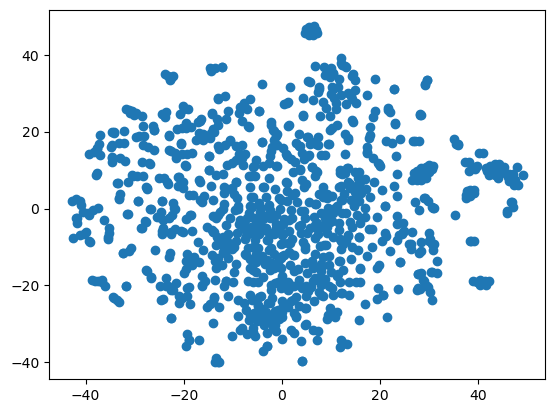

In [32]:
plt.scatter(Y[:, 0], Y[:, 1])

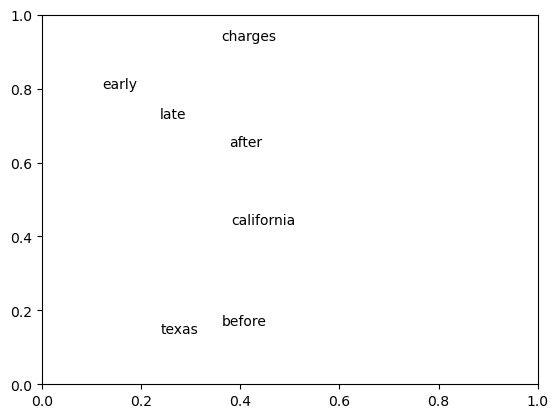

In [33]:
for label, x, y in zip(words, X[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()